In [1]:
import numpy as np
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy
from netCDF4 import Dataset
import glob

In [2]:
days = np.arange(0,4018)
dates = [datetime.date(2010,1,1)+datetime.timedelta(days=int(days)) for days in days]

In [3]:
snow = 'SMLG_ERA5'

In [4]:
datapath = '/Users/carmennab/Dropbox/alpha_retracker/data/validation/BGEP/'

bgep_lons = {} ; bgep_lats = {} ; bgep_dates = {}

bgep_buoys = ['ULS_A','ULS_B','ULS_D']
bgep_names = ['BGEP-A','BGEP-B','BGEP-D']

for buoy,buoy_name in zip(bgep_buoys,bgep_names):
    file = Dataset(datapath+buoy+'/'+snow+'_SIT_EASE_01Jan2010-30Apr2021.nc')
    bgep_lons[buoy_name] = np.array(file['Longitude'])
    bgep_lats[buoy_name] = np.array(file['Latitude'])
    
    buoy_dates = []
    for day in days:
        if (file['Sea Ice Thickness'][day]>0):
            buoy_dates.append(dates[day])
        
    bgep_dates[buoy_name] = np.array(buoy_dates)

In [5]:
datapath = '/Users/carmennab/Dropbox/alpha_retracker/data/validation/Sumata_2023/sit/'

sumata_lons = {} ; sumata_lats = {} ; sumata_dates = {}

sumata_buoys = ['F11','F12','F13','F14']
sumata_names = ['AOO-F11','AOO-F12','AOO-F13','AOO-F14']

months = np.arange(1,13)
years = np.arange(2010,2022)

for buoy,buoy_name in zip(sumata_buoys,sumata_names):
    
    file = Dataset(datapath+snow+'_'+buoy+'_SIT_EASE.nc')
    sumata_lons[buoy_name] = np.array(file['Longitude'])
    sumata_lats[buoy_name] = np.array(file['Latitude'])

    buoy_dates = []
    for day in days:
        date = dates[day]
        yearmonth = f'{date.year}{date.month:02d}'

        if yearmonth in file['Month']:
            if ~np.isnan(np.array(file['Sea Ice Thickness'])[np.array(file['Month'])==yearmonth]):
                buoy_dates.append(date)
            
    sumata_dates[buoy_name] = np.array(buoy_dates)

In [6]:
np.float = float

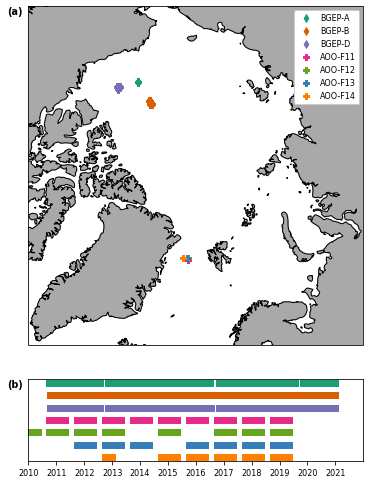

In [29]:
bgep_colors = ['#1b9e77','#d95f02','#7570b3']
sumata_colors = ['#e7298a','#66a61e','#377eb8','#ff7f00']

fig = plt.figure(figsize=(6,9))
plt.rc('font', size=8)
spec = gridspec.GridSpec(ncols=1, nrows=2,height_ratios=[5,1],hspace=0.)

### map
ax = fig.add_subplot(spec[0],projection=ccrs.NorthPolarStereo())

for c,buoy in enumerate(bgep_names):
    ax.scatter(bgep_lons[buoy],bgep_lats[buoy],c=bgep_colors[c],transform=ccrs.PlateCarree(),label=buoy,
               s=30,marker="d")
    
for c, buoy in enumerate(sumata_names):
    ax.scatter(sumata_lons[buoy],sumata_lats[buoy],c=sumata_colors[c],transform=ccrs.PlateCarree(),label=buoy,
               s=30,marker="P")
    
ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
ax.add_feature(cartopy.feature.OCEAN, color='white', edgecolor='black')
ax.set_extent([-180, 180, 90, 67], ccrs.PlateCarree())
ax.coastlines()
ax.legend(loc='upper right',framealpha=1)
ax.set_title('(a)',fontweight='bold', x = -0.04,y = 0.958)

### timeline

ax2 = fig.add_subplot(spec[1])
for count, name in enumerate(bgep_names):
    ax2.scatter(bgep_dates[name],np.full(bgep_dates[name].shape,-count),color=bgep_colors[count],marker='s')
for count, name in enumerate(sumata_names):
    ax2.scatter(sumata_dates[name],np.full(sumata_dates[name].shape,-count-3),color=sumata_colors[count],marker='s')
ax2.set_yticks([])
ax2.set_xticks([datetime.date(2010, 1, 1), datetime.date(2011, 1, 1), datetime.date(2012, 1, 1),
                datetime.date(2013, 1, 1), datetime.date(2014, 1, 1), datetime.date(2015, 1, 1),
                datetime.date(2016, 1, 1), datetime.date(2017, 1, 1), datetime.date(2018, 1, 1), 
                datetime.date(2019, 1, 1), datetime.date(2020, 1, 1), datetime.date(2021, 1, 1)])
ax2.set_xticklabels(np.arange(2010,2022))
ax2.set_xlim([datetime.date(2010, 1, 1), datetime.date(2022, 1, 1)])
ax2.set_title('(b)',fontweight='bold', x = -0.04,y = 0.825)

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Alpha Retracker/supp_figs/buoy_locs.png',
            bbox_inches = "tight", dpi = 400)